In [1]:
import functions_new_jit as func
import importlib

###########################################################################################################################################

import numpy as np
import matplotlib.pyplot as plt
import random as rd
from IPython.display import clear_output
import time

import numba

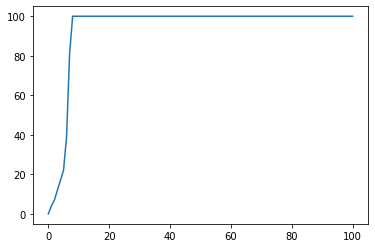

In [2]:
N = 100
average = 24
deviation = 12

agents = func.create_agents(N,average,deviation)

steps = 100
sector0_size = 100
sector1_size = 0

#progression = func.simulate_riot_stochastic_exit(agents, steps)

system = func.System(agents, sector0_size, sector1_size)
progression = func.simulate_riot_sectors_exit(system, steps)

plt.figure()
#plt.plot(progression)
plt.plot(progression[0])
plt.ylim(-5,1.05*N)
plt.show()

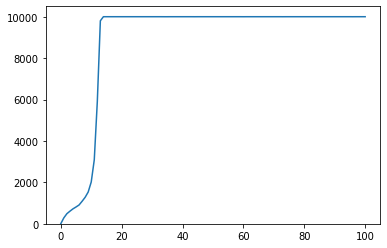

In [17]:
N = 10000
average = 28
deviation = 12

agents = func.create_agents(N,average,deviation)
agents2 = np.copy(agents)

steps = 100
sector0_size = N
sector1_size = 0

#progression, states = func.simulate_riot_stochastic_exit_intermediary(agents, steps)

system = func.System(agents, sector0_size, sector1_size)

progression, states = func.simulate_riot_sectors_exit_intermediary(system, steps)

agents = agents2

plt.figure()
#plt.plot(progression)
plt.plot(progression[0])
plt.ylim(-5,N+N/20)
plt.show()

In [14]:
thresholds = np.zeros(N)

for i in range(N):
    thresholds[i] = agents[i].threshold
    
thresholds = sorted(thresholds)
#print(thresholds)

threshs = np.linspace(0,101, 102,endpoint = True)
print(threshs)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101.]


In [15]:
prediction = np.zeros(101)
thresholdsFloored = np.zeros(N)
for i in range(N):
    thresholdsFloored[i] = np.floor(thresholds[i]) 
    
for i in range(101):
    prediction[i] = np.count_nonzero(thresholdsFloored == i)
    
#print(thresholds)
print(thresholdsFloored)
print(prediction)

[ 0.  0.  0. ... 69. 70. 71.]
[148.  31.  34.  45.  51.  74.  84.  68.  79.  90. 117. 138. 137. 159.
 187. 227. 218. 226. 235. 256. 265. 294. 313. 306. 313. 337. 327. 333.
 327. 301. 304. 316. 296. 299. 314. 264. 241. 255. 242. 193. 200. 179.
 150. 121. 149. 101. 103.  93.  82.  69.  58.  52.  34.  28.  24.  18.
  18.  15.  17.  13.   3.   7.   1.   5.   5.   2.   2.   1.   2.   2.
   1.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]


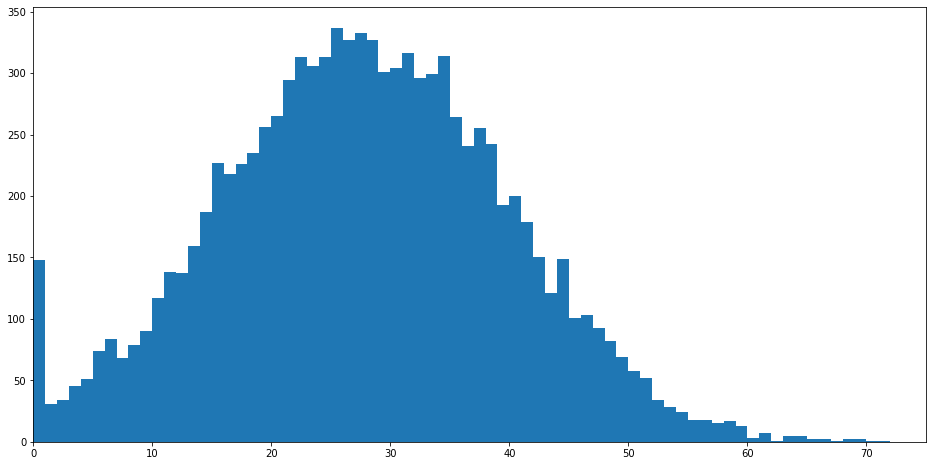

In [16]:
plt.figure(figsize=(16,8))
plt.hist(thresholdsFloored,threshs)
plt.xlim(0,thresholdsFloored[-2] + 5)
plt.show()

In [7]:
passo = 1

funcXs = np.linspace(0.5,100.5,101,endpoint=True)
m = 20

for i in range(steps):
    if i%passo == 0:
        a = input()
        if a == "":
            #print(progression[i])
            funcYs = 1 / (1 + np.exp( m * ((funcXs-0.5)/100 - progression[0][i]/N) ) )
            plt.figure(figsize=(16,8))
            plt.hist(thresholdsFloored,threshs)
            plt.hist(states[i][0], threshs)
            plt.plot(funcXs,np.multiply(funcYs,prediction),'r')
            plt.xlim(0,thresholds[-1] + 5)
            plt.show()
            #print(states[i])
            #print(progression[i]/N * 100)
            clear_output(wait=True)
            if progression[0][i] == N:
                break
        elif a != "":
            break

 44


In [7]:
def peFunction(progression):
    tau = np.linspace(0,100,1000,endpoint=True)
    res = 1/(1 + np.exp(m * (tau/100 - progression/N)))
    return res

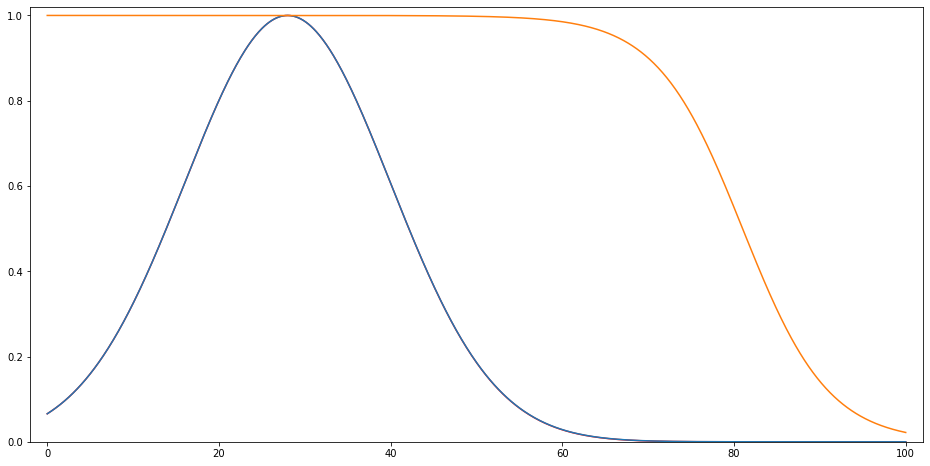

In [8]:
m = 20

tau = np.linspace(0,100,1000,endpoint=True)
f_p = 1/(deviation * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((tau - average)*(tau - average))/(deviation*deviation))
p_e = peFunction(progression[0][5])
f_s = np.multiply(f_p,p_e)

plt.figure(figsize=(16,8))
plt.plot(tau,f_s*(1/max(f_p)),'r')
plt.plot(tau,f_p*(1/max(f_p)))
plt.plot(tau,p_e)
plt.xlim(-2,100 + 2)
plt.ylim(0,1+0.02)
plt.show()

In [9]:
from scipy.integrate import quad

n=0
f_p = 1/(deviation * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((tau - average)*(tau - average))/(deviation*deviation))
p_e = peFunction(n)
f_s = np.multiply(f_p,p_e)

def previsao(x, n, N):
    a = 1/(1 + np.exp(m * (x/100 - n/N)))
    b = 1/(deviation * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x - average)*(x - average))/(deviation*deviation))
    res = a*b
    return res

In [10]:
passo = 1

tau = np.linspace(0,100,1000,endpoint=True)
f_p = 1/(deviation * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((tau - average)*(tau - average))/(deviation*deviation))

m = 20

for i in range(1,steps):
    if i%passo == 0:
        a = input()
        if a == "":
            #print(progression[i])
            p_e = peFunction(progression[0][i-1])
            #resultado exato
            f_s = np.multiply(f_p,p_e) 
            
            plt.figure(figsize=(16,8))
            plt.hist(thresholdsFloored,threshs)
            plt.hist(states[i][0], threshs)
            plt.plot(tau,f_p*N,'k')
            plt.plot(tau,f_s*N,'r')
            plt.xlim(0,thresholds[-1] + 5)
            plt.show()
            a = -30
            b = 100
            print("Integral: " + str(N*quad(previsao, a, b, args=(progression[0][i-1],N))[0]))
            print("Progresso: " + str(progression[0][i]))
            print("Erro: " + str(((N*quad(previsao, a, b, args=(progression[0][i-1],N))[0]) - progression[0][i])/progression[0][i]))
            #print(states[i])
            #print(progression[i]/N * 100)
            clear_output(wait=True)
            if progression[0][i] == N:
                break
        elif a != "":
            break

 1


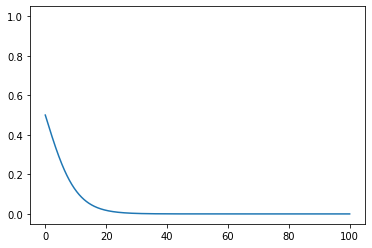

In [16]:
funcXs = np.linspace(0,100,1000)
m = 20
funcYs = 1 / (1 + np.exp( m * (funcXs/100 - 0) ) )

plt.figure()
plt.plot(funcXs,funcYs)
plt.xlim(-5,105)
plt.ylim(-0.05,1.05)
plt.show()